# "Data Scientist: The Sexiest Job of the 21st Century"
In this case study we try to analyze how 2020 year was important for data scientist. we try to visualize what are the tools and techniques people are following.

With this analysis we try to come up with some insights of data which we  will definitely recommend to follow.
This data analysis definitely help to distinguish between Myth and Reality of data scientist.
I am super excited as this is my first notebook in kaggle which going to be public .

# IF YOU LIKE THIS NOTEBOOK. PLEASE UPVOTE IT 
 Also **Check my another notebook**: Do you feel Data Science is growing(2019-2020)?
https://www.kaggle.com/krishna1997gopal/do-you-feel-data-science-is-growing-2019-2020?rvi=1



0. [Basic exploratory data analysis](#section-zero)
    - [5.1 Load library](#load)
    - [5.2 Read Dataset](#read-dataset)
1. [Characterstics Distribution Based on Gender](#section-one)
     - [Gender Distribution](#gender)
     - [Age Distribution](#age)
     - [Coding Experience](#code)
     - [Country](#country)
     - [Education](#education)
     - [Current-role](#role)
2. [Preferences based on Gender](#section-two)
     - [Programming Language](#lan)
     - [MOOC-Courses](#plateform)
     - [Tool](#tool)
     - [Media Sources](#media)
     - [Plateform for Sharing Work](#Plateform)
3. [Machine Learning Analysis](#section-three)
     - [ML-Algorithm](#ML-algorithm)
     - [Popular IDE and Visualization](#visualization)
     - [Hardware and Experience](#ML-Hardware)
4. [Salary Distribution](#section-four)
    

<a id="section-zero"></a>
# Basic Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Read the data

In [ ]:
data=pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv",skiprows=1)
print("Number of columns in data:",data.shape[1])
print("Number of rows in data:",data.shape[0])
data.head(3)

In [ ]:
df = data[data.columns[1:21]] #we take subset of data
df.head()

<a id="section-one"></a>
# Characterstics Distribution based on Gender:

<a id="gender"></a>
# Gender distribution:
As we going to analyze how many man and womens are there which want to land thereself as Data Scientist.
For gender feature , I am doing univariate analysis so I came up with pie chart

In [ ]:
colors1 = ['dodgerblue', 'plum', '#F0A30A','#8c564b'] 
counts = data['What is your gender? - Selected Choice'].value_counts(sort=True)
labels = counts.index
values = counts.values

pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors1,line=dict(color='#000000', width=1)))
layout = go.Layout(title='Gender Distribution in 2020')

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

1. Clearly we can see that huge gender  imbalance still there.
2. There are 78.8% men and 19.4% are women, It will directly impact the field of AI.


<a id="age"></a>
# Age_distribution:

In [ ]:
fig = go.Figure(go.Bar(
            y=df['What is your age (# years)?'].values,
            x=df['What is your age (# years)?'].value_counts(sort=True).values,
            orientation='h',
            marker=dict(color='rgba(246, 78, 139, 0.6)',
            line=dict(color='rgba(246, 78, 139, 1.0)', width=3))))
                
fig.show()

In [ ]:
labels=['18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+']
values=df['What is your age (# years)?'].value_counts(sort=True).values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

1. There are peoples who's age lies between 18-21 years are maximum in numers where as 70+ are very less(obvious 70+ people are more intersting to read others documentation("personal opinion") or they just make  chill out in the life).
2. overall we can tell 18 to 34 years people are in majority. As with this age group people mostly contains students and working people so they are mostly active peoples who spend there time in kaggle to learn and contribute to community.

so better we analyze the age distribution across male and female

In [ ]:
male = df[df['What is your gender? - Selected Choice']=='Man']
female = df[df['What is your gender? - Selected Choice']=='Woman']



count_male = male['What is your age (# years)?'].value_counts().reset_index()
count_female = female['What is your age (# years)?'].value_counts().reset_index()

pie_men = go.Pie(labels=count_male['index'],values=count_male['What is your age (# years)?'],name="Men",hole=0.4,domain={'x': [0,0.46]})

pie_women = go.Pie(labels=count_female['index'],values=count_female['What is your age (# years)?'],name="Women",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Age group', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)

1. There are 22.8% woman are in age group of 22-24 is mostly active in kaggle where same age group of men is only 18%. 
2. Mostly man who are in there 25-29 are most active age group where in woman 22-24 age group is most active age group.

<a id="code"></a>
# Coding-Experience:

In [ ]:
male = df[df['What is your gender? - Selected Choice']=='Man']
female = df[df['What is your gender? - Selected Choice']=='Woman']



count_male = male['For how many years have you been writing code and/or programming?'].value_counts().reset_index()
count_female = female['For how many years have you been writing code and/or programming?'].value_counts().reset_index()

pie_men = go.Pie(labels=count_male['index'],values=count_male['For how many years have you been writing code and/or programming?'],name="Men",hole=0.4,domain={'x': [0,0.46]})

pie_women = go.Pie(labels=count_female['index'],values=count_female['For how many years have you been writing code and/or programming?'],name="Women",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Writing Code Experience', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)

1. Most women have coding experience of 1-2 years where man have 3-5 years of writing code.
2. writing more and more code will really helpful to land ourself as Data scientist.
3. 19.5% womans have experience of less than one year of writing code where this number is only 16.9% in case of man..

<a id="education"></a>
# Highest level of Formal Education.

In [ ]:
df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts()

In [ ]:
labels =['Masters degree','Bachelors degree','Doctoral degree','Some college/university study without earning a bachelorâ€™s degree','Professional degree','I prefer not to answer','No formal education past high school']
values =df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

1. Masters degree people are landing thereself more in kaggle compare to bachelor's people.
2. Kaggle is a community which always motivate us to read, practice and learn then apply, Many masters people have to write there own thesis in that kaggle definately help them.
3. There are the peoples who not have any formal education but they still are there in kaggle, it can show us how much high level of interest peple have to learn data science

In [ ]:
male=data[data['What is your gender? - Selected Choice']=='Man']
female=data[data['What is your gender? - Selected Choice']=='Woman']

In [ ]:
count_male = male['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().reset_index()
count_female = female['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().reset_index()

pie_men = go.Pie(labels=count_male['index'],values=count_male['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'],name="Men",hole=0.4,domain={'x': [0,0.46]})

pie_women = go.Pie(labels=count_female['index'],values=count_female['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'],name="Women",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'highest level of formal education', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)

1. Doctoral degree contains more females compared to male. As we see many females choose to pursue higher degree compared to  male in there life.
2. There are people who still not earn bachelor's degree are paricipating.

<a id="country"></a>
# Country:

In [ ]:
import plotly.express as px
country_wise_distribution=data['In which country do you currently reside?'].value_counts()
fig = px.choropleth(country_wise_distribution.values, locations=country_wise_distribution.index,
                    locationmode='country names',
                    color=country_wise_distribution.values,
                    color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title="Country_wise Distribution of Data Scientists")
fig.show()

1. India is the country from where lot's of data scientist are coming in the world.

In [ ]:
topn=20
count_male = male['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_female = female['In which country do you currently reside?'].value_counts()[:topn].reset_index()

pie_men = go.Pie(labels=count_male['index'],values=count_male['In which country do you currently reside?'],name="Men",hole=0.4,domain={'x': [0,0.46]})

pie_women = go.Pie(labels=count_female['index'],values=count_female['In which country do you currently reside?'],name="Women",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Country_wise_male and female ', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)

1. Female in india is landing more compared to male whereas in Japan male are more compared to female 

<a id="role"></a>
# Current role:

In [ ]:
from wordcloud import WordCloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(14.0,16.0), 
                   title = None, title_size=40, image_color=False):
    

    wordcloud = WordCloud(background_color='black',max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"], title="Word Cloud of current_role")

In [ ]:
trace1 = go.Bar(
                    x =df.index,
                    y =df["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"],
                    orientation='h',
                    marker = dict(color='skyblue',
                                 line=dict(color='skyblue',width=1)),
                    text = df.index)
data = [trace1]
layout = go.Layout(barmode = "group",title="current role_title",width=800, height=500, 
                       xaxis= dict(title="current role_title"),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
count_male = male['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts().reset_index()
count_female = female['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts().reset_index()

pie_men = go.Pie(labels=count_male['index'],values=count_male['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'],name="Men",hole=0.4,domain={'x': [0,0.46]})

pie_women = go.Pie(labels=count_female['index'],values=count_female['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'],name="Women",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Current_Role', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)

<a id="section-two"></a>
# Preferenc Based on Gender Distribution

<a id="lan"></a>
# Languages programming which use on a regular basis:

In [ ]:
labels = ['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','None','Other']
values = [15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

1. So people are using Python is the most than sql than R.

2. There is always war happen when anyone want to start learning Data science, we confused what to learn first "Python" or "R".But according to 2020 SQL coming after python because a Data scientist should know how to store data in database. so we should choose sql also when we are talking between python and R

In [ ]:
from plotly.subplots import make_subplots
Python=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python']=='Python']
R=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R']=='R']
C=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C']=='C']
SQL=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL']=='SQL']
Java=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java']=='Java']
Javascript=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript']=='Javascript']
Julia=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia']=='Julia']
Swift=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift']=='Swift']
MATLAB=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB']=='MATLAB']
BASH=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash']=='Bash']
          
          
          
topn = 7
count_Python = Python['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_R = R['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_C = C['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_SQL = SQL['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_Java = Java['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_Javascript = Javascript['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_Julia = Julia['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_Swift = Swift['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_MATLAB=MATLAB['In which country do you currently reside?'].value_counts()[:topn].reset_index()
count_Bash=BASH['In which country do you currently reside?'].value_counts()[:topn].reset_index()





fig = make_subplots(rows=5, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
        [{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
        [{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
        [{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
        [{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],subplot_titles=('Python',' ',' ',' ','R', 
                                                                                                                     " ",'C',' ','SQL',' ',
                                                                                                                     'Java',' ',' ',' ',' ','Java-script',
                                                                                                                     ' ','Julia',' ','Swift','',
                                                                                                                     'Matlab',' ',' ',' ','Bash'))
fig.add_trace(go.Pie(labels=count_Python['index'], values=count_Python['In which country do you currently reside?'],name="Python",hole=0.6,domain={'x': [0,0.46]}), 1, 1)
fig.add_trace(go.Pie(labels=count_R['index'], values=count_R['In which country do you currently reside?'],name="R",hole=0.4,domain={'x': [0.52,1]}), 1, 5)
fig.add_trace(go.Pie(labels=count_C['index'], values=count_C['In which country do you currently reside?'],name="C",hole=0.4,domain={'x': [0,0.46]}), 2, 2)
fig.add_trace(go.Pie(labels=count_SQL['index'], values=count_SQL['In which country do you currently reside?'],name="SQL",hole=0.4,domain={'x': [0,0.46]}), 2, 4)
fig.add_trace(go.Pie(labels=count_Java['index'], values=count_Java['In which country do you currently reside?'],name="Java",hole=0.5,domain={'x': [0.52,1]}),3, 1)
fig.add_trace(go.Pie(labels=count_Javascript['index'], values=count_Javascript['In which country do you currently reside?'],name="J-script",hole=0.4,domain={'x': [0,0.46]}),3, 5)
fig.add_trace(go.Pie(labels=count_Julia['index'], values=count_Julia['In which country do you currently reside?'],name="Julia",hole=0.4,domain={'x': [0,0.46]}),4, 2)
fig.add_trace(go.Pie(labels=count_Swift['index'], values=count_Swift['In which country do you currently reside?'],name="Swift",hole=0.4,domain={'x': [0,0.46]}),4, 4)
fig.add_trace(go.Pie(labels=count_MATLAB['index'], values=count_MATLAB['In which country do you currently reside?'],name='MATLAB',hole=0.4,domain={'x': [0,0.46]}),5, 1)
fig.add_trace(go.Pie(labels=count_Bash['index'], values=count_Bash['In which country do you currently reside?'],name="Bash",hole=0.4,domain={'x': [0,0.46]}),5, 5)



fig.update_traces(hole=.6, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Language popularity in different countries",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='', x=0.027, y=1.10, font_size=20, showarrow=False),
                dict(text='', x=0.27, y=0.85, font_size=20, showarrow=False),
                dict(text='', x=0.75, y=0.85, font_size=20, showarrow=False),
                dict(text='', x=0.95, y=1.10, font_size=20, showarrow=False),
                dict(text='', x=0.04, y=0.65, font_size=20, showarrow=False),
                dict(text='', x=0.65, y=0.4, font_size=20, showarrow=False),
                dict(text='', x=0.35, y=0.4, font_size=20, showarrow=False),
                dict(text='', x=0.99, y=0.65, font_size=20, showarrow=False),
                dict(text='', x=0.027, y=0.15, font_size=20, showarrow=False),
                dict(text='', x=0.95, y=0.15, font_size=20, showarrow=False),])
fig.show()




#India
1. Most people from india know C very well as it is basic language and people start learning this language in there school, so C language is the most famous and regualr basis language in India even compare to Python.
2. Popularity of SQL is more in india compare to R.
3. Even India is leading in JULIA also, which is famous for fastest calculation.

In [ ]:
Python=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python']=='Python']
R=df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R']=='R']
 
topn = 10
count_Python = Python['What is your gender? - Selected Choice'].value_counts()[:topn].reset_index()
count_R = R['What is your gender? - Selected Choice'].value_counts()[:topn].reset_index()

pie_python = go.Pie(labels=count_Python['index'],values=count_Python['What is your gender? - Selected Choice'],name="Python",hole=0.4,domain={'x': [0,0.46]})

pie_r = go.Pie(labels=count_R['index'],values=count_R['What is your gender? - Selected Choice'],name="R",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Python or R', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Python', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='R', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_python, pie_r], layout=layout)
py.iplot(fig)

AS we come to our tilte of notebook, there are 80.7% male people know python where 77.1%  Male people know  R.
for male Python is pretty famous and used in there work while compare to female 21.2% knows R and only 17.6% knows python
for female R is leading to Python.

In [ ]:
count_male = male['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts().reset_index()
count_female = female['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts().reset_index()

pie_men = go.Pie(labels=count_male['index'],values=count_male['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'],name="Men",hole=0.4,domain={'x': [0,0.46]})

pie_women = go.Pie(labels=count_female['index'],values=count_female['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'],name="Women",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Language_selction', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)

Above visualization makes us clear about selction of programming language across gender.

In [ ]:
data=pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
data.drop(data.index[0],inplace=True)
df2=data

<a id="plateform"></a>
# Platforms Popularity for data science courses.
> There are many plateform exist from where people learn data science courses like python,machine-learning,etc. As Data science is in demand and many peoples are doing well in this field.So let's see which plateform in trends and then we see how male and female responds to that plateforms.

In [ ]:
df2['Q37_Part_3'].replace({'Kaggle Learn Courses':'Kaggle'},inplace=True)
df2['Q37_Part_10'].replace({'University Courses (resulting in a university degree)':'University Courses'},inplace=True)
df2['Q37_Part_9'].replace({'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)':'Cloud-certification'},inplace=True)

In [ ]:
import operator
mooc={} # dictionary is seems to be very helpful for analyzing where we have more than one choice for selection.
for i in range(10):
    value=df2['Q37_Part_'+str(i+1)].value_counts().values[0]
    text=df2['Q37_Part_'+str(i+1)].value_counts().index[0]
    mooc[text]=value
mooc=dict(sorted(mooc.items(), key=operator.itemgetter(1)))

x=list(mooc.keys())
y=list(mooc.values())

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"},{"type": "domain"}]],
)

fig.add_trace(go.Bar(x=x, y=y),
              row=1, col=1)
fig.add_trace(go.Pie(labels=x,values=y),
              row=1, col=2)
fig.update_layout(height=600, showlegend=False)
fig.show()

In [ ]:
wordcloud = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(mooc)
plt.figure(figsize=(9,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

1. Coursera is in trending, there are 22.3% people using coursera for learning data science. As we know the famous "Andrew Yan-Tak Ng" how smoothly he explained machine learning in his course. Also he was the founder of Coursera.
2. After that kaggle learn courses really helpful for quick learn and implement what ever you learned.Majority people love to see in reality what ever concept they learned.
3. why udemy comes on third favourite mooc plateform?
   I think udemy really attract peoples by giving sales for small period of time again and again.
   and to clear basics udemy is really great plateform to start anything from scratch in your data science journey.
4. Peoples who are pursuing there studies from univerity also come with great research work in data science.

In [ ]:
male = df2[df2['Q2']=='Man']
female = df2[df2['Q2']=='Woman']
#create dictionary here
man={}
woman={}
for i in range(10):
    count_male_value = male['Q37_Part_'+str(i+1)].value_counts().values[0]
    count_male_index = male['Q37_Part_'+str(i+1)].value_counts().index[0]
    count_female_value = female['Q37_Part_'+str(i+1)].value_counts().values[0]
    count_female_index = female['Q37_Part_'+str(i+1)].value_counts().index[0]
    man[count_male_index]=count_male_value
    woman[count_female_index]=count_female_value
man=dict(sorted(man.items(), key=operator.itemgetter(1))) #here key is mooc course name and value is how much male people took
woman=dict(sorted(woman.items(), key=operator.itemgetter(1)))

#Visualization
x_man=list(man.keys())
y_man=list(man.values())
x_woman=list(woman.keys())
y_woman=list(woman.values())


pie_men = go.Pie(labels=x_man,values=y_man,name="Men",hole=0.4,domain={'x': [0,0.46]})
pie_women = go.Pie(labels=x_woman,values=y_woman,name="Women",hole=0.5,domain={'x': [0.52,1]})
layout = dict(title = 'MOOC_COURSESR_DISTRIBUTION', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Man', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Woman', showarrow=False, font=dict(size=20)) ])
fig = dict(data=[pie_men, pie_women], layout=layout)
py.iplot(fig)

* Near about 23.4% male and 22.9% female are using Coursera for there learning.
* From university courses more females are there compare to male, may be the reason females do there work with perfection(my-opinion) compare to male so they can easily getting degree from university whereas males have to study hard for getting degree.
* There are more number of females in DATACAMP compared to males.

so mostly we found females have higher chances to complete data science course from university and DataCamp comapred to males

<a id="tool"></a>
# Tools to analyze data:
Data analysis is the most imporatant concepts if we are talking about Data science, there are different tools exist to analyze data according to peoples choice

In [ ]:
labels =df2['Q38'].value_counts().index
values =df2['Q38'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

Okya!! There are many peoples who are doing work on mostly jupiyter and Rstudio as we know both plateform are used by all level of peoples and mostly they are very easy for beginners so that we can see there are 46%people near about using it in place of other plateforms.
Data science is all about how you understand data and to understand data we should know how data is handle by statistcal software and in this task EXCEL perfoem well.But what is interesting here? we know people nowdays deploying there models by using clouds but that people atleast more than intermedite level so percentage of cloud based data software is less upto this time but as the data science increase to grow may be they service also will grow.

In [ ]:
x_man_data_analysis=male['Q38'].value_counts().index
y_man_data_analysis=male['Q38'].value_counts().values

x_woman_data_analysis=female['Q38'].value_counts().index
y_woman_data_analysis=female['Q38'].value_counts().values

pie_man_data_analysis = go.Pie(labels=x_man_data_analysis,values=y_man_data_analysis,name="Men",hole=0.4,domain={'x': [0,0.46]})
pie_woman_data_analysis = go.Pie(labels=x_woman_data_analysis,values=y_woman_data_analysis,name="Woman",hole=0.4,domain={'x': [0.46,1]})
layout = dict(title = 'Data Analysis Tools', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Man', showarrow=False, font=dict(size=20)),
                             dict(x=0.75, y=0.5, text='Woman', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_man_data_analysis,pie_woman_data_analysis], layout=layout)
py.iplot(fig)

 Women are leading men in Basic statistical software and Business intelligence software also in Advanced statistical software.Or we can also tell women like to analyze and visualize data more comapre to men in this 2020.

<a id="media"></a>
# Media sources Data Science Topics:

In [ ]:
from plotly.subplots import make_subplots
media,man_media,woman_media={},{},{}
for i in range(10):
    values=df2['Q39_Part_'+str(i+1)].value_counts().values[0]
    index=df2['Q39_Part_'+str(i+1)].value_counts().index[0]
    media[index]=values
    count_male_media_values=male['Q39_Part_'+str(i+1)].value_counts().values[0]
    count_male_media_index=male['Q39_Part_'+str(i+1)].value_counts().index[0]
    man_media[count_male_media_index]=count_male_media_values
    count_female_media_values=female['Q39_Part_'+str(i+1)].value_counts().values[0]
    count_female_media_index=female['Q39_Part_'+str(i+1)].value_counts().index[0]
    woman_media[count_female_media_index]=count_female_media_values
media=dict(sorted(media.items(), key=operator.itemgetter(1)))
man_media=dict(sorted(man_media.items(), key=operator.itemgetter(1)))
woman_media=dict(sorted(woman_media.items(), key=operator.itemgetter(1)))

#for media
x_media_values=list(media.keys())
y_media_values=list(media.values())
#for man
x_man_media=list(man_media.keys())
y_man_media=list(man_media.values())
#for woman
x_woman_media=list(woman_media.keys())
y_woman_media=list(woman_media.values())


fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"}]],
)

fig.add_trace(go.Bar(x=x_media_values, y=y_media_values),
              row=1, col=1)
fig.add_trace(go.Pie(labels=x_media_values,values=y_media_values),
              row=2, col=2)
fig.update_layout(height=800, showlegend=False)
fig.show()

Interesting facts:
1. Kaggle is famous to learn ,read, and implement as well share with people whatever you are learning so definatley Kaggle is leading in data science compare to all other media plateform.
2. People are learning and share through video content there learning and due to this Youtube is in trending for learning.
3. Blogs one of the most important and necessary step to continue journey in data science.
4. But there is no too much difference in Twitter,Email Newsletters and journel publication.

Most imporatnt learning concept is if you are learning then you should share and there is responsibility of others people also who ever read should learn something from it...

In [ ]:
pie_men_media = go.Pie(labels=x_man_media,values=y_man_media,name="Men",hole=0.4,domain={'x': [0,0.46]})
pie_women_media = go.Pie(labels=x_woman_media,values=y_woman_media,name="Women",hole=0.5,domain={'x': [0.52,1]})
layout = dict(title = 'Media', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Man', showarrow=False, font=dict(size=20)),
                             dict(x=0.78, y=0.5, text='Woman', showarrow=False, font=dict(size=20)) ])
fig = dict(data=[pie_men_media, pie_women_media], layout=layout)
py.iplot(fig)

 I read somewhere Women likes reading more and more compared to men and that what we are seeing here, Women reading blogs are more compared to men.
 And with respect to others plateforms all most participation is equal from both end...

<a id="Plateform"></a>
# Publicly share Plateforms for data analysis or machine learning applications:

In [ ]:
public_share_man,public_share_woman={},{}
for i in range(8):
    values_male=male['Q36_Part_'+str(i+1)].value_counts().values[0]
    index=male['Q36_Part_'+str(i+1)].value_counts().index[0]
    values_female=female['Q36_Part_'+str(i+1)].value_counts().values[0]
    index=female['Q36_Part_'+str(i+1)].value_counts().index[0]
    public_share_man[index]=values_male
    public_share_woman[index]=values_female
public_share_man=dict(sorted(public_share_man.items(),key=operator.itemgetter(1)))
public_share_woman=dict(sorted(public_share_woman.items(),key=operator.itemgetter(1)))

In [ ]:
x_man_share=list(public_share_man.keys())
y_man_share=list(public_share_man.values())
x_woman_share=list(public_share_woman.keys())
y_woman_share=list(public_share_woman.values())
fig = go.Figure()
fig.add_trace(go.Bar(
    y=x_man_share,
    x=y_man_share,
    name='MAN',
    orientation='h',
    marker=dict(
        color='rgb(0,0,128)',
        line=dict(color='rgb(0,0,128)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=x_woman_share,
    x=y_woman_share,
    name='WOMAN',
    orientation='h',
    marker=dict(
        color='rgb(255,0,255)',
        line=dict(color='rgb(255,0,255)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.show()

Github is one of the famous plateform where we share whatever we learned.As men using more github same for women also.

## Data visualization libraries or tools

In [ ]:
viz={}
viz_man,viz_woman={},{}
for i in range(8):
    values=df2['Q14_Part_'+str(i+1)].value_counts().values[0]
    index=df2['Q14_Part_'+str(i+1)].value_counts().index[0]
    values_male=male['Q14_Part_'+str(i+1)].value_counts().values[0]
    index_male=male['Q14_Part_'+str(i+1)].value_counts().index[0]
    values_female=female['Q14_Part_'+str(i+1)].value_counts().values[0]
    index_female=female['Q14_Part_'+str(i+1)].value_counts().index[0]
    viz_man[index]=values_male
    viz[index]=values
    viz_woman[index]=values_female
    
viz=dict(sorted(viz.items(),key=operator.itemgetter(1)))
viz_man=dict(sorted(viz_man.items(),key=operator.itemgetter(1)))
viz_woman=dict(sorted(viz_woman.items(),key=operator.itemgetter(1)))



In [ ]:
x_man_viz=list(viz_man.keys())
y_man_viz=list(viz_man.values())
x_woman_viz=list(viz_woman.keys())
y_woman_viz=list(viz_woman.values())

fig = go.Figure()
fig.add_trace(go.Bar(
    y=x_man_viz,
    x=y_man_viz,
    name='MAN',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=x_woman_viz,
    x=y_woman_viz,
    name='WOMAN',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.show()


1. Number of females using ggplot library of R is more comapred to plotly in Python.
2. As we know there are more women who are using R for data analysis so may be the reasopn 

<a id="section-three"></a>
# Machine Learning Analysis:

<a id="ML-algorithm"></a>
# Machine Learning Algorithms:

In [ ]:
ml_algo={}
for i in range(11):
    count_ml_algo_values=df2['Q17_Part_'+str(i+1)].value_counts().values[0]
    count_ml_algo_index=df2['Q17_Part_'+str(i+1)].value_counts().index[0]
    ml_algo[count_ml_algo_index]=count_ml_algo_values
ml_algo=dict(sorted(ml_algo.items(), key=operator.itemgetter(1)))
cv={}
for i in range(6):
    count_cv_values=df2['Q18_Part_'+str(i+1)].value_counts().values[0]
    count_cv_index=df2['Q18_Part_'+str(i+1)].value_counts().index[0]
    cv[count_cv_index]=count_cv_values
cv=dict(sorted(cv.items(), key=operator.itemgetter(1)))
nlp={}
for i in range(4):
    count_nlp_values=df2['Q19_Part_'+str(i+1)].value_counts().values[0]
    count_nlp_index=df2['Q19_Part_'+str(i+1)].value_counts().index[0]
    nlp[count_nlp_index]=count_nlp_values
nlp=dict(sorted(nlp.items(), key=operator.itemgetter(1)))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[36, 10])
wordcloud1 = WordCloud( background_color='Black',
                        width=600,
                        height=500,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(ml_algo)
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Machine-Learning-Algorithm',fontsize=40);

wordcloud2 = WordCloud( background_color='Black',
                        width=600,
                        height=500,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(cv)
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Computer-Vision',fontsize=40);

wordcloud3 = WordCloud( background_color='Black',
                        width=600,
                        height=500,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(nlp)
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('NLP',fontsize=40);

1. So overall in 2020 Peoples are more familar with Machine learning algorithms like decision tree, linear and logistic regression 
2. Word cloud showing the currently many peoples become more familar with NLP compare to Computer vision wordcloud.

Now Let's analyze how's male and female making there contribution in machine learning

In [ ]:
ml_algo={}
man_ml_algo,woman_ml_algo={},{}
#Machine-learning
for i in range(11):
    count_ml_algo_values=df2['Q17_Part_'+str(i+1)].value_counts().values[0]
    count_ml_algo_index=df2['Q17_Part_'+str(i+1)].value_counts().index[0]
    count_man_ml_algo_values=male['Q17_Part_'+str(i+1)].value_counts().values[0]
    count_man_ml_algo_index=male['Q17_Part_'+str(i+1)].value_counts().index[0]
    count_woman_ml_algo_values=female['Q17_Part_'+str(i+1)].value_counts().values[0]
    count_woman_ml_algo_index=female['Q17_Part_'+str(i+1)].value_counts().index[0]
    ml_algo[count_ml_algo_index]=count_ml_algo_values
    man_ml_algo[count_man_ml_algo_index]=count_man_ml_algo_values
    woman_ml_algo[count_woman_ml_algo_index]=count_woman_ml_algo_values
    
ml_algo=dict(sorted(ml_algo.items(), key=operator.itemgetter(1)))
man_ml_algo=dict(sorted(man_ml_algo.items(), key=operator.itemgetter(1)))
woman_ml_algo=dict(sorted(woman_ml_algo.items(), key=operator.itemgetter(1)))
#Computer vision
cv={}
man_cv,woman_cv={},{}
for i in range(6):
    count_cv_values=df2['Q18_Part_'+str(i+1)].value_counts().values[0]
    count_cv_index=df2['Q18_Part_'+str(i+1)].value_counts().index[0]
    count_man_cv_values=male['Q18_Part_'+str(i+1)].value_counts().values[0]
    count_man_cv_index=male['Q18_Part_'+str(i+1)].value_counts().index[0]
    count_woman_cv_values=female['Q18_Part_'+str(i+1)].value_counts().values[0]
    count_woman_cv_index=female['Q18_Part_'+str(i+1)].value_counts().index[0]
    cv[count_cv_index]=count_cv_values
    man_cv[count_man_cv_index]=count_man_cv_values
    woman_cv[count_woman_cv_index]=count_woman_cv_values
    
cv=dict(sorted(cv.items(), key=operator.itemgetter(1)))
man_cv=dict(sorted(man_cv.items(), key=operator.itemgetter(1)))
woman_cv=dict(sorted(woman_cv.items(), key=operator.itemgetter(1)))

#Natural language programming
nlp={}
man_nlp,woman_nlp={},{}
for i in range(4):
    count_nlp_values=df2['Q19_Part_'+str(i+1)].value_counts().values[0]
    count_nlp_index=df2['Q19_Part_'+str(i+1)].value_counts().index[0]
    count_man_nlp_values=male['Q19_Part_'+str(i+1)].value_counts().values[0]
    count_man_nlp_index=male['Q19_Part_'+str(i+1)].value_counts().index[0]
    count_woman_nlp_values=female['Q19_Part_'+str(i+1)].value_counts().values[0]
    count_woman_nlp_index=female['Q19_Part_'+str(i+1)].value_counts().index[0]
    nlp[count_nlp_index]=count_nlp_values
    man_nlp[count_man_nlp_index]=count_man_nlp_values
    woman_nlp[count_woman_nlp_index]=count_woman_nlp_values
    
nlp=dict(sorted(nlp.items(), key=operator.itemgetter(1)))
man_nlp=dict(sorted(man_nlp.items(), key=operator.itemgetter(1)))
woman_nlp=dict(sorted(woman_nlp.items(), key=operator.itemgetter(1)))

In [ ]:

x_ml_algo=list(ml_algo.keys())
y_ml_algo=list(ml_algo.values())
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"},{"type": "domain"}]])

fig.add_trace(go.Bar(x=x_ml_algo, y=y_ml_algo),
              row=1, col=1)
fig.add_trace(go.Pie(labels=x_ml_algo,values=y_ml_algo),
              row=1, col=2)
fig.update_layout(title = 'Machine-learning-Algorithm-',height=600,showlegend=False)
fig.show()

In [ ]:
x_man_ml_algo=list(man_ml_algo.keys())
y_man_ml_algo=list(man_ml_algo.values())

x_woman_ml_algo=list(woman_ml_algo.keys())
y_woman_ml_algo=list(woman_ml_algo.values())

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"},{"type": "xy"}]],subplot_titles=('Male preferences on ML Models','Female preferences on ML Models'))

fig.add_trace(go.Bar(x=x_man_ml_algo, y=y_man_ml_algo),
              row=1, col=1)
fig.add_trace(go.Bar(x=x_woman_ml_algo,y=y_woman_ml_algo),
              row=1, col=2)
fig.update_layout(title = 'Machine-learning-Algorithm',height=600,showlegend=False)
fig.show()

* We are not comparing here male and female because here also same story will going to repeat of imbalanced but on other sides if we look women mostly like Bayesian approch and it's good to see there contriution on Transformer Networks like BERT also.
  where looking both the graph we can say mostly peoples still beleive Linear or logistic Regresson works farily well but according to me it's all about data, there is nothing like favourite algorithm , Its all about hit and trial and choose best 

In [ ]:
ml_algo={}
for i in range(11):
    count_ml_algo_values=df2['Q17_Part_'+str(i+1)].value_counts().values[0]
    count_ml_algo_index=df2['Q17_Part_'+str(i+1)].value_counts().index[0]
    ml_algo[count_ml_algo_index]=count_ml_algo_values
ml_algo=dict(sorted(ml_algo.items(), key=operator.itemgetter(1)))
cv={}
for i in range(6):
    count_cv_values=df2['Q18_Part_'+str(i+1)].value_counts().values[0]
    count_cv_index=df2['Q18_Part_'+str(i+1)].value_counts().index[0]
    cv[count_cv_index]=count_cv_values
cv=dict(sorted(cv.items(), key=operator.itemgetter(1)))
nlp={}
for i in range(4):
    count_nlp_values=df2['Q19_Part_'+str(i+1)].value_counts().values[0]
    count_nlp_index=df2['Q19_Part_'+str(i+1)].value_counts().index[0]
    nlp[count_nlp_index]=count_nlp_values
nlp=dict(sorted(nlp.items(), key=operator.itemgetter(1)))

In [ ]:
x_cv=list(cv.keys())
y_cv=list(cv.values())
x_man_cv=list(man_cv.keys())
y_man_cv=list(man_cv.values())

x_woman_cv=list(woman_cv.keys())
y_woman_cv=list(woman_cv.values())

x_nlp=list(nlp.keys())
y_nlp=list(nlp.values())

x_man_nlp=list(man_nlp.keys())
y_man_nlp=list(man_nlp.values())

x_woman_nlp=list(woman_nlp.keys())
y_woman_nlp=list(woman_nlp.values())

In [ ]:
stages = x_nlp
df_mtl = pd.DataFrame(dict(number=y_man_nlp, stage=stages))
df_mtl['Gender'] = 'Man'
df_toronto = pd.DataFrame(dict(number=y_woman_nlp, stage=stages))
df_toronto['Gender'] = 'Woman'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='Gender')
fig.show()

In [ ]:
stages = x_cv
df_mtl = pd.DataFrame(dict(number=y_man_cv, stage=stages))
df_mtl['Gender'] = 'Man'
df_toronto = pd.DataFrame(dict(number=y_woman_cv, stage=stages))
df_toronto['Gender'] = 'Woman'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='Gender')
fig.show()

* We know this data is imbalanced but still it's look good the females which are doing participation,they try to give best, yes we can tell in very less number but they are trying whereas contribution from male is upto mark in all the field of natural language processing and computer vision

<a id="visualization"></a>
# Visualization Libraries or IDE:

In [ ]:

ide_male,ide_female=[],[]
ide_val_male,ide_val_female=[],[]
for i in range(10):
    value_male=male['Q9_Part_'+str(i+1)].value_counts().values[0]
    text_male=male['Q9_Part_'+str(i+1)].value_counts().index[0]
    value_female=female['Q9_Part_'+str(i+1)].value_counts().values[0]
    text_female=female['Q9_Part_'+str(i+1)].value_counts().index[0]
    ide_male.append(text_male)
    ide_val_male.append(value_male)
    ide_female.append(text_female)
    ide_val_female.append(value_female)
    
data_ide_tuples_male = list(zip(ide_male,ide_val_male))
data_ide_tuples_female = list(zip(ide_female,ide_val_female))

df_male=pd.DataFrame(data_ide_tuples_male, columns=['IDE','Male'])
df_female=pd.DataFrame(data_ide_tuples_female, columns=['IDE','Female'])

df_ide=df_male.merge(df_female,on='IDE')
df_ide

In [ ]:
vis_male,vis_female=[],[]
vis_val_male,vis_val_female=[],[]
for i in range(10):
    value_male=male['Q14_Part_'+str(i+1)].value_counts().values[0]
    text_male=male['Q14_Part_'+str(i+1)].value_counts().index[0]
    value_female=female['Q14_Part_'+str(i+1)].value_counts().values[0]
    text_female=female['Q14_Part_'+str(i+1)].value_counts().index[0]
    vis_male.append(text_male)
    vis_val_male.append(value_male)
    vis_female.append(text_female)
    vis_val_female.append(value_female)
    
data_vis_tuples_male = list(zip(vis_male,vis_val_male))
data_vis_tuples_female = list(zip(vis_female,vis_val_female))

df_male=pd.DataFrame(data_vis_tuples_male, columns=['VIS','Male'])
df_female=pd.DataFrame(data_vis_tuples_female, columns=['VIS','Female'])

df_vis=df_male.merge(df_female,on='VIS')
df_vis

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scatter"},{"type": "scatter"}]],subplot_titles=('Integrated Development Environments','Visualization Library'))
fig.add_trace(go.Scatter(
    x=df_vis['VIS'].values,
    y=df_vis['Male'].values,
    name = 'Vis_Male'
),row=1,col=2)
fig.add_trace(go.Scatter(
    x=df_vis['VIS'].values,
    y=df_vis['Female'].values,
    name='Vis_Female',
),row=1,col=2)


fig.add_trace(go.Scatter(
    x=df_ide['IDE'].values,
    y=df_ide['Male'].values,
    name = 'Ide_Male'
),row=1,col=1)
fig.add_trace(go.Scatter(
    x=df_ide['IDE'].values,
    y=df_ide['Female'].values,
    name='Ide_Female',
),row=1,col=1)

fig['layout'].update( height=500,width=1000)
py.offline.iplot(fig)


* Talking about IDE mostly peoples are used Jupyter notebooks one of the beginer's favourite and easy to learn in starting. So both male and female like this compared to all other ide we have but it quite intersting to see many males peoples changes there choice according to experience or work but females looks quite same in using of IDE.
* Matplotlib won race if we talk about visualization library followed by seaborn then ggplot gaining popularity in both of gender male and female

<a id="ML-Hardware"></a>
# Hardware and Experience:

In [ ]:
hrd_male,hrd_female=[],[]
hrd_val_male,hrd_val_female=[],[]
for i in range(3):
    value_male=male['Q12_Part_'+str(i+1)].value_counts().values[0]
    text_male=male['Q12_Part_'+str(i+1)].value_counts().index[0]
    value_female=female['Q12_Part_'+str(i+1)].value_counts().values[0]
    text_female=female['Q12_Part_'+str(i+1)].value_counts().index[0]
    hrd_male.append(text_male)
    hrd_val_male.append(value_male)
    hrd_female.append(text_female)
    hrd_val_female.append(value_female)

data_hrd_tuples_male = list(zip(hrd_male,hrd_val_male))
data_hrd_tuples_female = list(zip(hrd_female,hrd_val_female))

df_female=pd.DataFrame(data_hrd_tuples_female, columns=['HRD','Male'])
df_male=pd.DataFrame(data_hrd_tuples_male, columns=['HRD','Female'])
df_hrd=df_female.merge(df_male,on='HRD')
#df_hrd

Tpu_index_male=male['Q13'].value_counts().index
Tpu_values_male=male['Q13'].value_counts().values

Tpu_index_female=female['Q13'].value_counts().index
Tpu_values_female=female['Q13'].value_counts().values

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"},{"type": "xy"}],
         
          [ {"type": "scatter","colspan":2},None]],subplot_titles=("TPU_USUAGE","ML_METHODS_EXPEROENCE","Specialized Hardware")
)

fig.add_trace(go.Bar(x=Tpu_index_male,
                y=Tpu_values_male,
                name='Male',
                marker_color='rgb(55, 83, 109)'
                ),row=1, col=1)
fig.add_trace(go.Bar(x=Tpu_index_female,
                y=Tpu_values_female,
                name='Female',
                marker_color='rgb(26, 118, 255)'
                ),row=1, col=1)


fig.add_trace(go.Bar(x=male['Q6'].value_counts().index,
                y=male['Q6'].value_counts().values,
                name='Male',
                marker_color='rgb(55, 83, 109)'
                ),row=1, col=2)
fig.add_trace(go.Bar(x=female['Q6'].value_counts().index,
                y=female['Q6'].value_counts().values,
                name='2019',
                marker_color='rgb(26, 118, 255)'
                ),row=1, col=2)

fig.add_trace(go.Scatter(
    x=df_hrd['HRD'].values,
    y=df_hrd['Male'].values,
    name = 'Male'
),row=2,col=1)
fig.add_trace(go.Scatter(
    x=df_hrd['HRD'].values,
    y=df_hrd['Female'].values,
    name='Female',
),row=2,col=1)



fig.update_layout(height=800, showlegend=False,
    title='Experience_Distribution',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
#fig.update_layout(height=900, showlegend=False)
fig.show()

* TPU is new entry in hardware after GPU came so there are lot's of people never used TPU upto this time that we can see easily in our data also but there are some male who used TPU more than 25 times but hardly we can see there any women. overall TPU is still new and will use as we grow in  data science faster.
* Talking about ML methods used on regular basis we can see female are more who have 1-2 years of experience and there are more male who have 3-5 years of experience 
* . There are very less number of people who are using machine learning more than 20 years
* . As Data Science is in trend so there are many begginers in this field so under 1 year this number is high
* . Interesting there are people who do not use machine learning methods 

<a id="section-four"></a>
# Salary Distribution:

In [ ]:
y_salary=df2['Q24'].value_counts().index
y_male=male['Q24'].value_counts().values
y_female=female['Q24'].value_counts().values

fig = go.Figure(go.Bar(x=y_salary, y=y_male, name='Man'))
fig.add_trace(go.Bar(x=y_salary, y=y_female, name='Woman'))


fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

* So salary distribution also point out us to think about participation of women and men in data science.
* Clearly we can see there are hardly women who's salary more than $500000. As we know this filed is growing more and more so there are many fresher's people who show and contribute there knowledge in this filed and earing salary $0-999.


In [ ]:
#which degree people earning more salary in Data Science.
salary_values=df2['Q24'].fillna("not-diclosed").value_counts().values
salary_index=df2['Q24'].fillna("not-diclosed").value_counts().index

bachelors=df2[df2['Q4']=="Bachelor’s degree"]
masters=df2[df2['Q4']=="Master’s degree"]
doctoral=df2[df2['Q4']=="Doctoral degree"]
professional=df2[df2['Q4']=="Professional degree"]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=salary_index,
    y=masters['Q24'].fillna("not-diclosed").value_counts().values,
    name='Master’s degree',
    marker_color='rgba(255, 0, 0, 0.8)'
))
fig.add_trace(go.Bar(
    x=salary_index,
    y=bachelors['Q24'].fillna("not-diclosed").value_counts().values,
    name='Bachelor’s degree',
    marker_color='rgba(255, 0, 0, 0.6)'
))
fig.add_trace(go.Bar(
    x=salary_index,
    y=doctoral['Q24'].fillna("not-diclosed").value_counts().values,
    name='Doctoral degree',
    marker_color='rgba(255, 0, 0, 0.4)'
))

fig.add_trace(go.Bar(
    x=salary_index,
    y=professional['Q24'].fillna("not-diclosed").value_counts().values,
    name='Professional degree',
    marker_color='rgba(255, 0, 0, 0.2)'
))
fig.update_layout(barmode='group', xaxis_tickangle=55,height=600,width=1000,title='Salary according to highest education',xaxis_title='Salary',yaxis_title='Number of people')
fig.show()

* There are lot of people who not want to disclosed there salary.It's okay no worry.
* In all our education degree the people who pursuing there masters or completed there masters have higher salary comapred to all other degree.
if you are planning to learn data science better to do masters as they have more salary and proper knowledge in one field.
* After master's yes the chances for bachelor's people are there as they just pass out from college and as fresher's they can learn more and more stuff.

# Conclusion:
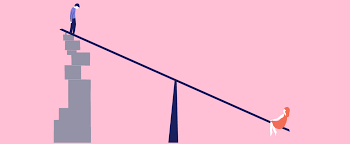

Data is highly imbalnced across gender group.
* It's over responsibilty to make women aware about data science and make them motivate to participate in this field. We know we can explore more about new ideas of data science if female contribution also will increase.
* The people who are palnning to come in data science and have master's in there hand are the people who going to rule later in this field.
* If you know python then it's more than enough as we see number of people's who know python and other languages above.But having knowledge of Python,SQL,R will be a good combination.
* In therms of colab and kaggle almost they both look like brother and people are using equally.
* Most intersting that Youtube gaining importance compared to blog where this result is oppsite in 2019.
* People loves courseera content more comapred to other mooc courses.
* I hope when we will do this compition in 2021 we wish to see this gender gap reduced atleast compared to 2020.

Common girls! It's your time to come and take stand in Data science.

**Check it my another notebook**: Do you feel Data Science is growing(2019-2020)?
https://www.kaggle.com/krishna1997gopal/do-you-feel-data-science-is-growing-2019-2020?rvi=1

# If you like my notebook please UPVOTE it.
**THANKS FOR READING**